In [279]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import exp

In [280]:
#df = pd.read_csv('heart.csv')
df.head()
df.describe

<bound method NDFrame.describe of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1  

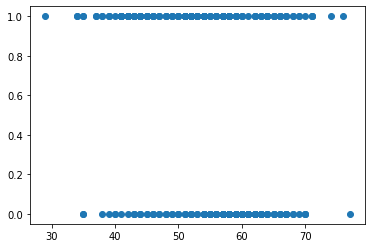

In [281]:
# Visualizing the dataset
plt.scatter(df['age'], df['target'])
plt.show()


In [282]:
X = df[["age", "sex"]]
y = df["target"]

In [283]:
def sigmoid(z):
    """
    z = b + W1x1 + W2x2 + ... + Wnxn
    """
    return 1 / (1 + np.exp(-z))


In [284]:
def cost(X, y, weights, b, sigma):
    """
    X.shape = [row, column]  x.shape[0] = count of row
    np.dot = multiply x and w

    return the loss function
    """
    size = X.shape[0]
    
    loss = - 1 / size * np.sum(y * np.log(sigma) + (1 - y) * np.log(1 - sigma))
    return loss


In [285]:
def gradient_descent(X, y, learning_rate, weights, bias, sigma):
    size = X.shape[0]

    dw = 1/size * np.dot(X.T, (sigma - y))
    db = 1/size * np.sum(sigma - y)
    weights -= learning_rate * dw
    bias -= learning_rate * db 
    return weights, bias


In [286]:
def fit(X, y, lr, parameters, iter):
    """
    parameters is the dict with keys (weights, bias)
    weights is a zero matrix with length of x.column 
    bias the first time is 0
    """
    weights = parameters["weights"]
    bias = parameters["bias"]
    for i in range(iter): 
        z = np.dot(X, weights) + bias
        sigma = sigmoid(z)
        loss = cost(X, y, weights, bias, sigma)
        weights, bias = gradient_descent(X, y, lr, weights, bias, sigma)
        parameters["weights"], parameters["bias"] = weights, bias

    return parameters

In [287]:
def train (X, y, lr, iter):
    """
    return the dict parameters with updating weights and bias
    """
    set_parameters = {}
    set_parameters["weights"] = np.zeros(X.shape[1])
    set_parameters["bias"] = 0
    parameters = fit(X, y, lr, set_parameters, iter)

    return parameters

In [288]:
parameters = train(X, y, lr = 0.001, iter = 1000)

z = np.dot(X, parameters["weights"]) + parameters["bias"]
predictions = sigmoid(z) >= 0.5

accuracy = 0
for i in range(X.shape[0]):
    if y.iloc[i] == predictions[i]:
        accuracy += 1
prob = accuracy / X.shape[0]
print(f"Accuracy: {prob} ")

Accuracy: 0.5445544554455446 


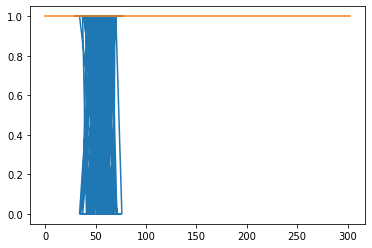

     age  sex
0     63    1
1     37    1
2     41    0
3     56    1
4     57    0
..   ...  ...
298   57    0
299   45    1
300   68    1
301   57    1
302   57    0

[303 rows x 2 columns]


In [289]:

plt.plot(X["age"], X["sex"], predictions)
plt.show()
print(X)